In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D ,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
import keras
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,LSTM
from sklearn.metrics import plot_confusion_matrix,roc_curve, roc_auc_score
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report 
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
# #images = np.load('/content/drive/MyDrive/images.npy')
# def extract_number(string):
#     r = re.compile(r'(\d+)')
#     return int(r.findall(string)[0])


# dim = (300, 300)
# mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\images file'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = np.empty((len(sortedFiles),300,300))
# for n in range(0, len(sortedFiles)):
#   img = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
#   images[n] = cv2.resize(img, dim)
# label_motion = np.ones((len(images[:,1,1]))-952)
# label_therapy = np.zeros((len(images[:,1,1]))-663)
# y = np.hstack((label_motion,label_therapy))

# print(images.shape)
# print(y.shape)

In [3]:
#images = np.load('/content/drive/MyDrive/images.npy')
def extract_number(string):
    r = re.compile(r'(\d+)')
    return int(r.findall(string)[0])


dim = (300, 300)
mypath= r'C:\Users\phmeay\Desktop\Work files\DTF-PDC\OPDC\OPDC\images file'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
sortedFiles = sorted(onlyfiles ,key=lambda x: extract_number(x) )
# images = numpy.empty(len(sortedFiles), dtype=object)
images =[]
for n in range(0, len(sortedFiles)):
  img  = cv2.imread( join(mypath,sortedFiles[n]),cv2.IMREAD_GRAYSCALE  )
  images.append(img)
  # images[n] = cv2.resize(img, dim)
images =np.array(images)
label_motion = np.ones((len(images[:,1,1]))-952)
label_therapy = np.zeros((len(images[:,1,1]))-663)
y = np.hstack((label_motion,label_therapy))

print(images.shape)
print(y.shape)

(1615, 656, 875)
(1615,)


In [4]:
X= images.reshape((images.shape[0], 656*875))

In [5]:
num_classes =2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

In [6]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

In [7]:
pca = PCA(0.90)

In [8]:
pca.fit(X_train)

PCA(n_components=0.9)

In [9]:
pca.n_components_

43

In [10]:
train_img_pca = pca.transform(X_train)
test_img_pca = pca.transform(X_test)
print(train_img_pca.shape)
print(test_img_pca.shape)
print(len(train_img_pca[1,:]))

(1130, 43)
(485, 43)
43


In [11]:
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
batch_size = 128
num_classes = 2
epochs = 30

In [13]:
model = Sequential()
model.add(Dense(96, activation='relu', input_shape=(43,)))
model.add(Dense(64, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 10,562
Trainable params: 10,562
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/30
9/9 [==============================] - 0s 19ms/step - loss: 1.7451 - accuracy: 0.5681 - val_loss: 0.6190 - val_accuracy: 0.7814
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.8265 - val_loss: 0.4274 - val_accuracy: 0.8825
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.9009 - val_loss: 0.3515 - val_accuracy: 0.9072
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.9257 - val_loss: 0.2961 - val_accuracy: 0.9196
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9363 - val_loss: 0.2672 - val_accuracy: 0.9216
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9416 - val_loss: 0.2414 - val_accuracy: 0.9320
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9584 - val_loss: 0.2376 - val_accuracy: 0.9278
Epoch 8/30
9/9 [=================

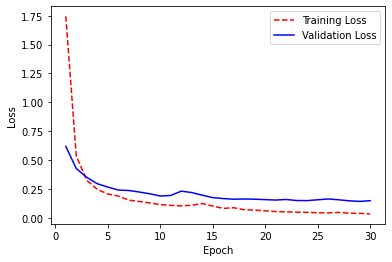

In [16]:
# Get training and validation loss histories 
training_loss = history.history['loss'] 
test_loss = history.history['val_loss'] 
 
# Create count of the number of epochs 
plt.figure() 
epoch_count = range(1, len(training_loss) + 1) 
 
# Visualize loss history 
plt.plot(epoch_count, training_loss, 'r--') 
plt.plot(epoch_count, test_loss, 'b-') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.show();

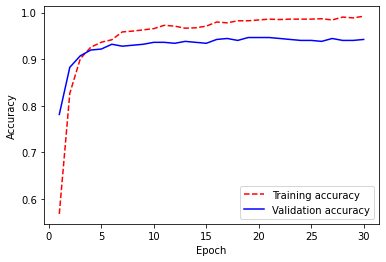

In [17]:
# Get training and validation accuracy histories 
training_acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
 
# Create count of the number of epochs 
plt.figure() 
epoch_count = range(1, len(training_acc) + 1) 
 
# Visualize accuracy history 
plt.plot(epoch_count, training_acc, 'r--') 
plt.plot(epoch_count, val_acc, 'b-') 
plt.legend(['Training accuracy', 'Validation accuracy']) 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.show(); 

In [18]:
# Test the model after training 
test_results = model.evaluate(test_img_pca, y_test, verbose=1) 
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%') 

16/16 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.9423
Test results - Loss: 0.14937050640583038 - Accuracy: 0.9422680139541626%


In [19]:
y_pred = model.predict(test_img_pca) 

In [20]:
import seaborn as sns 
fig = plt.figure(figsize=(6, 6)) # Set Figure 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

<Figure size 432x432 with 0 Axes>

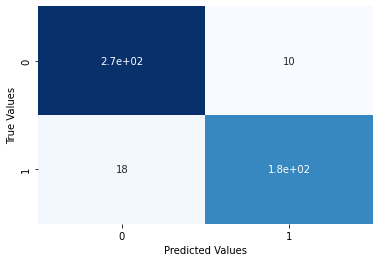

In [21]:
sns.heatmap(cm,  annot=True, cbar=False, cmap=plt.cm.Blues) 
plt.xlabel('Predicted Values') 
plt.ylabel('True Values'); 
plt.show();

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       282
           1       0.95      0.91      0.93       203

    accuracy                           0.94       485
   macro avg       0.94      0.94      0.94       485
weighted avg       0.94      0.94      0.94       485

